#**Cifar10**

##Dataset

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


##Normalizar

In [ ]:
from keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

##Librerías del modelo 1

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from keras.callbacks import EarlyStopping, TensorBoard
from keras import regularizers, optimizers
from keras.preprocessing.image import ImageDataGenerator

##Modelo 1

In [ ]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

##Resumen del modelo

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

##Historia del modelo 1

In [ ]:
history1=model1.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 19s 6ms/step - loss: 1.4679 - accuracy: 0.4707 - val_loss: 1.2553 - val_accuracy: 0.5533
Epoch 2/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1363 - accuracy: 0.6002 - val_loss: 1.1150 - val_accuracy: 0.6106
Epoch 3/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9915 - accuracy: 0.6544 - val_loss: 1.0217 - val_accuracy: 0.6479
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8890 - accuracy: 0.6897 - val_loss: 0.9802 - val_accuracy: 0.6601
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8055 - accuracy: 0.7181 - val_loss: 0.9696 - val_accuracy: 0.6676
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7205 - accuracy: 0.7480 - val_loss: 0.9847 - val_accuracy: 0.6667
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6572 - accuracy: 0.7686 - val_loss: 0.9666 - val_accurac

##Evaluación del modelo 1

In [ ]:
evaluation = model1.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 2.1506 - accuracy: 0.6605
Test Accuracy: 0.6604999899864197


##Gráfico de historia

<Axes: >

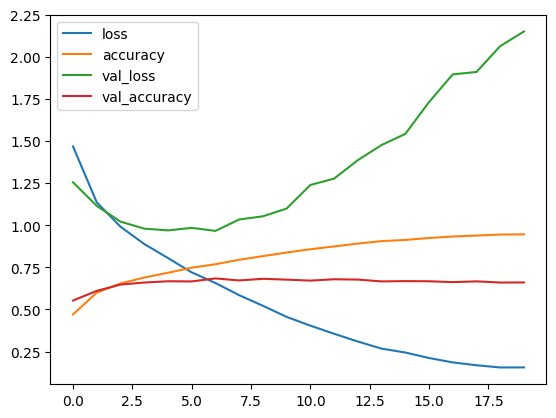

In [ ]:
import pandas as pd
pd.DataFrame(history1.history).plot()

##Modelo 2

Epoch 1/50
1563/1563 [==============================] - 17s 9ms/step - loss: 1.5476 - accuracy: 0.4295 - val_loss: 1.2106 - val_accuracy: 0.5788
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1496 - accuracy: 0.5907 - val_loss: 1.1336 - val_accuracy: 0.6029
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9661 - accuracy: 0.6579 - val_loss: 0.9029 - val_accuracy: 0.6917
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8670 - accuracy: 0.6944 - val_loss: 0.8175 - val_accuracy: 0.7102
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7904 - accuracy: 0.7225 - val_loss: 0.7454 - val_accuracy: 0.7420
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7388 - accuracy: 0.7387 - val_loss: 0.7566 - val_accuracy: 0.7419
Epoch 7/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.6937 - accuracy: 0.7548 - val_loss: 0.7603 - val_ac

<Axes: >

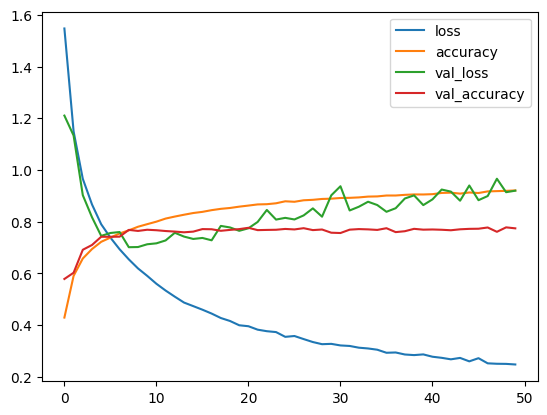

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model2.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.4))


model2.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model2.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.4))

model2.add(Flatten())

model2.add(Dense(units = 1024, activation = 'relu'))

model2.add(Dense(units = 1024, activation = 'relu'))

model2.add(Dense(units = 10, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history2=model2.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

evaluation = model2.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
pd.DataFrame(history3.history).plot()

##Modelo 3

In [ ]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.4))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history5=model5.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/50
1563/1563 [==============================] - 24s 11ms/step - loss: 1.5935 - accuracy: 0.4481 - val_loss: 1.1132 - val_accuracy: 0.5856
Epoch 2/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0682 - accuracy: 0.6250 - val_loss: 0.8840 - val_accuracy: 0.6920
Epoch 3/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8960 - accuracy: 0.6889 - val_loss: 0.7524 - val_accuracy: 0.7329
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7946 - accuracy: 0.7256 - val_loss: 0.7633 - val_accuracy: 0.7361
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7150 - accuracy: 0.7525 - val_loss: 0.6359 - val_accuracy: 0.7779
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6580 - accuracy: 0.7750 - val_loss: 0.6184 - val_accuracy: 0.7889
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6094 - accuracy: 0.7928 - val_loss: 0.5458 -

##Evaluación del modelo 3

313/313 [==============================] - 1s 4ms/step - loss: 0.4144 - accuracy: 0.8748
Test Accuracy: 0.8748000264167786


<Axes: >

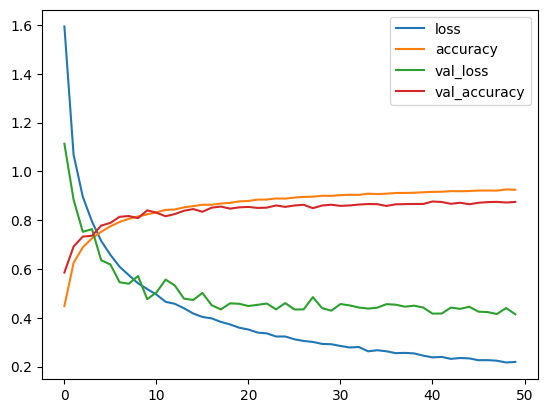

In [ ]:
evaluation = model5.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
pd.DataFrame(history5.history).plot()

#**MNIST**


##Librerías

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers

##Dataset

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


##Modelo

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

##Entrenar el modelo

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history5 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 4s 5ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0281 - val_accuracy: 0.9927
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0284 - val_accuracy: 0.9925
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.0264 - val_accuracy: 0.9928
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0274 - accuracy: 0.9908 - val_loss: 0.0270 - val_accuracy: 0.9932
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.0252 - val_accuracy: 0.9925
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0271 - val_accuracy: 0.9930
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0265 - val_accuracy: 0.9925
Epoch 

##Evaluar el modelo

Test loss: 0.0250417310744524
Test accuracy: 0.9922000169754028


<Axes: >

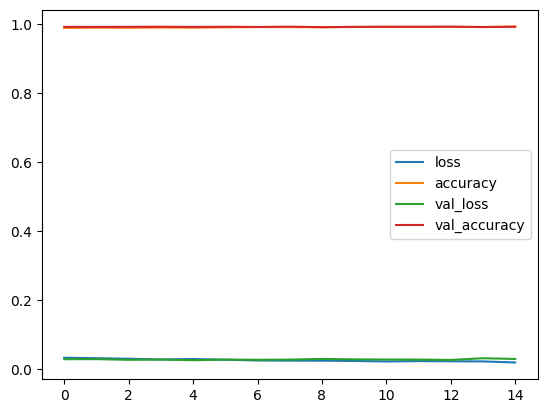

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
pd.DataFrame(history5.history).plot()